# Plotting 🎨

**Author:** James Cranley (<james.cranley@doctors.org.uk>)  
**Date:** March 2025

---

## Overview

In this tutorial, you'll learn how to visually explore and communicate the relationships between patient characteristics and outcomes—in this case, predicting 1-year mortality in a heart failure cohort. Using clear and informative plots, you'll enhance your understanding of data insights and effectively present your findings.

What You'll Learn

✅ **Boxplots**

✅ **Violin plots**

✅ **Logistic regression probability curves:** to illustrate how predictors influence outcome probabilities.

✅ **Forest plots:** to clearly communicate odds ratios and confidence intervals from multivariate analyses.

## Exercise
<div style="border-left: 4px solid #007acc; padding: 0.5em 1em; background-color: #f0f8ff; margin: 1em 0;">
  <h4>👨‍🏫 Bob</h4>
  <p>Stats are a bit boring on their own, can you make some plots?</p>
</div>

### Import packages

In [1]:
import os # operating system: for interacting with files
import pandas as pd # key tabular data package in python
import numpy as np # important package for mathematics in python
import matplotlib.pyplot as plt # plotting package
import seaborn as sns # another plotting package
import statsmodels.api as sm # a stats package

### Reading data into dataframes

In [2]:
input_file_path = "./results/HF_data_inc_mortality.xlsx" # define the relative path to the file

We read in the Excel file into a **pandas dataframe** called df.

In [3]:
df = pd.read_excel(input_file_path) # Pandas library has a built in Excel read/write function

### Inspect the data

In [4]:
df.head()

patient_ID   age  anaemia  creatinine_phosphokinase  diabetes  \
0      360061  75.0        0                       582         0   
1      118349  55.0        0                      7861         0   
2      557032  65.0        0                       146         0   
3      851734  50.0        1                       111         0   
4      375585  65.0        1                       160         1   

   ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
0                 20                    1  265000.00               1.9   
1                 38                    0  263358.03               1.1   
2                 20                    0  162000.00               1.3   
3                 20                    0  210000.00               1.9   
4                 20                    0  327000.00               2.7   

   serum_sodium  sex  smoking  one_year_mortality_status  
0           130    1        0                        1.0  
1           136    1        0                        1.0  
2           129    1        1                        1.0  
3           137    1        0                        1.0  
4           116    0        0                        1.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_ID                 299 non-null    int64  
 1   age                        299 non-null    float64
 2   anaemia                    299 non-null    int64  
 3   creatinine_phosphokinase   299 non-null    int64  
 4   diabetes                   299 non-null    int64  
 5   ejection_fraction          299 non-null    int64  
 6   high_blood_pressure        299 non-null    int64  
 7   platelets                  299 non-null    float64
 8   serum_creatinine           299 non-null    float64
 9   serum_sodium               299 non-null    int64  
 10  sex                        299 non-null    int64  
 11  smoking                    299 non-null    int64  
 12  one_year_mortality_status  289 non-null    float64
dtypes: float64(4), int64(9)
memory usage: 30.5 KB


In [6]:
# Drop rows with missing mortality status, since this is non-usable data
data_clean = df.dropna(subset=['one_year_mortality_status'])

## Boxplots

For the 4 variables (Age, Ejection Fraction, Serum Creatinine, Serum Sodium)

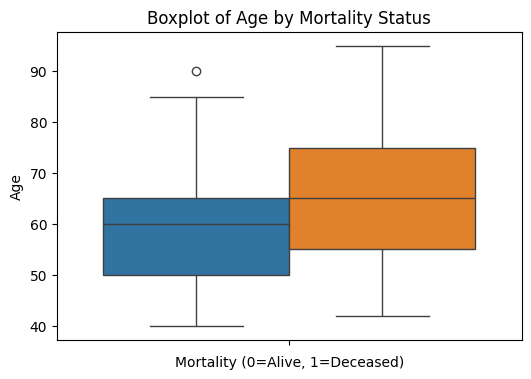

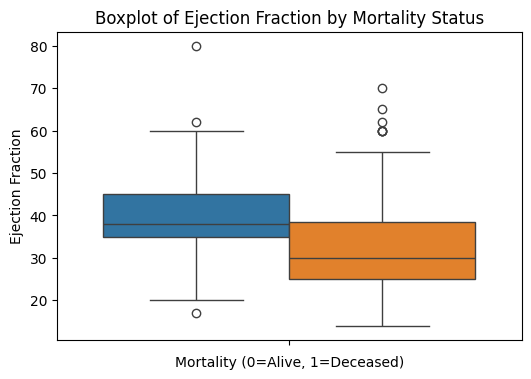

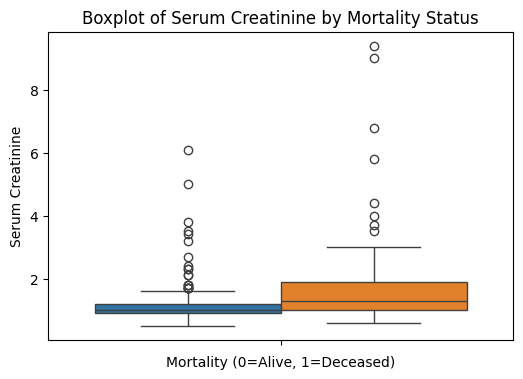

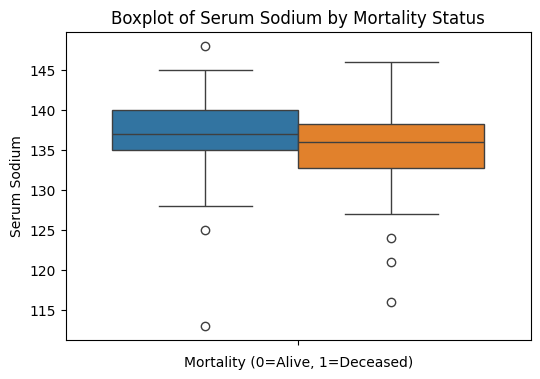

In [7]:
vars_to_plot = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

for var in vars_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=data_clean, 
        y=var, 
        hue='one_year_mortality_status', 
        legend=False
    )
    plt.title(f'Boxplot of {var.replace("_"," ").title()} by Mortality Status')
    plt.xlabel('Mortality (0=Alive, 1=Deceased)')
    plt.ylabel(var.replace("_"," ").title())
    plt.show()

## Violin plots

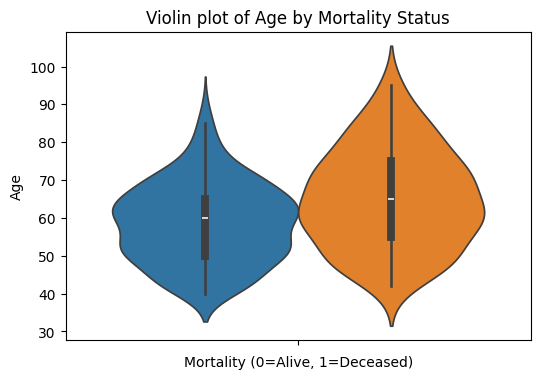

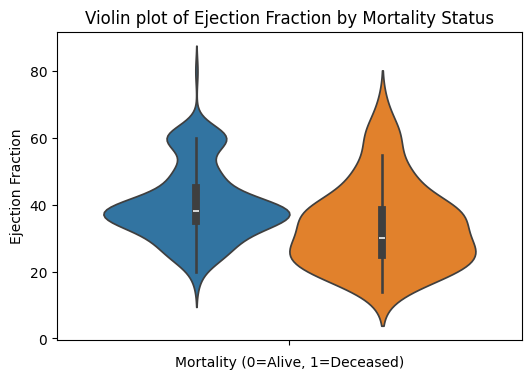

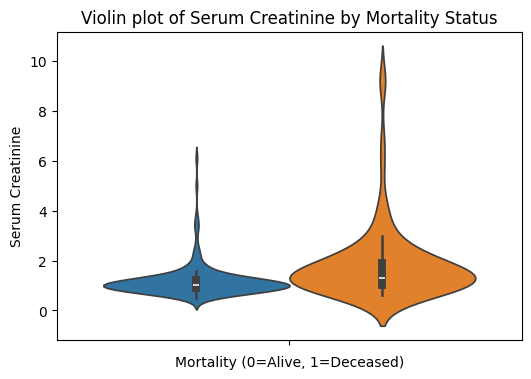

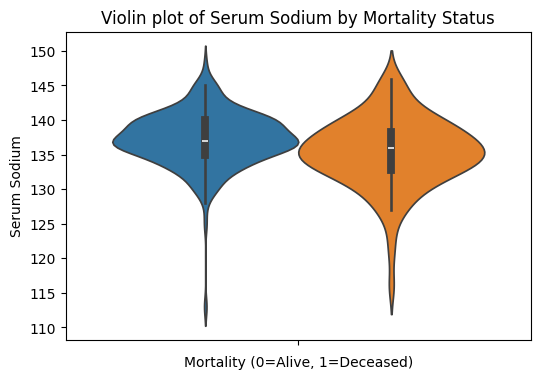

In [8]:
for var in vars_to_plot:
    plt.figure(figsize=(6,4))
    sns.violinplot(
        data=data_clean,
        y=var,
        hue='one_year_mortality_status',
        legend=False
    )
    plt.title(f'Violin plot of {var.replace("_"," ").title()} by Mortality Status')
    plt.xlabel('Mortality (0=Alive, 1=Deceased)')
    plt.ylabel(var.replace("_"," ").title())
    plt.show()

## Logistic regression curves

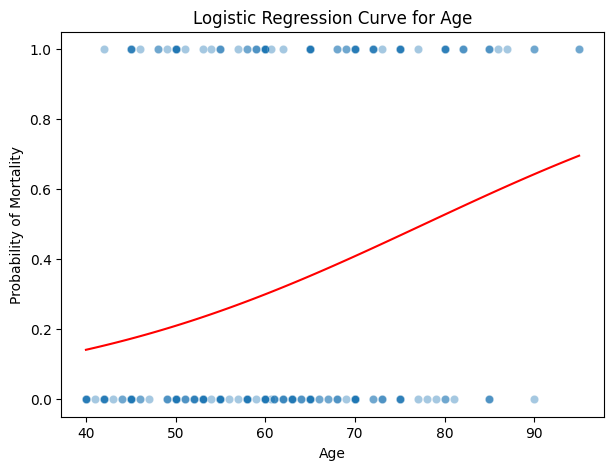

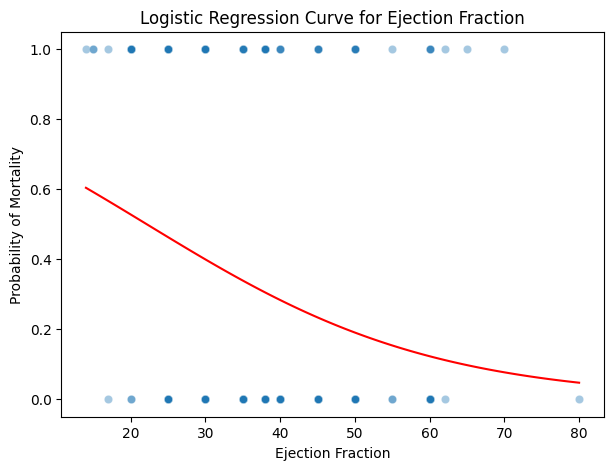

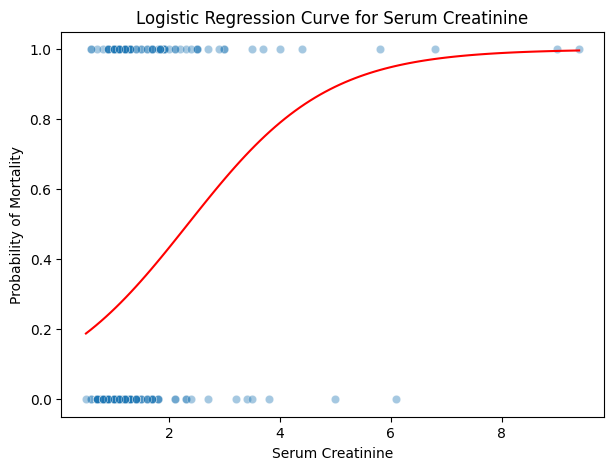

In [9]:
significant_vars = ['age', 'ejection_fraction', 'serum_creatinine']

for var in significant_vars:
    plt.figure(figsize=(7,5))

    # Prepare data for logistic regression
    X_var = sm.add_constant(data_clean[var])
    y = data_clean['one_year_mortality_status']

    # Fit logistic model with just the single variable for plotting
    model = sm.Logit(y, X_var).fit(disp=False)

    # Generate a range of values for the variable
    x_range = np.linspace(data_clean[var].min(), data_clean[var].max(), 100)
    X_plot = sm.add_constant(pd.DataFrame({var: x_range}))

    # Predicted probabilities
    y_prob = model.predict(X_plot)

    # Scatter actual data points
    sns.scatterplot(x=var, y='one_year_mortality_status', data=data_clean, alpha=0.4)

    # Plot logistic regression curve
    plt.plot(x_range, y_prob, color='red')
    plt.title(f'Logistic Regression Curve for {var.replace("_"," ").title()}')
    plt.xlabel(var.replace("_"," ").title())
    plt.ylabel('Probability of Mortality')
    plt.show()


## Forest Plot for Odds Ratios

<div style="border-left: 4px solid #007acc; padding: 0.5em 1em; background-color: #f0f8ff; margin: 1em 0;">
  <h4>👨‍🏫 Bob</h4>
  <p>Can you make a Forest Plot and save it as a PDF file?</p>
</div>

We first read in the model we made earlier (to extract the coefficients)

In [10]:
import pickle

model_path = "./results/logistic_model.pkl"
with open(model_path, 'rb') as file:
    logistic_model = pickle.load(file)
logistic_model

Now we make a table with the Odds Ratios and the CIs

In [11]:
# Extract Odds Ratios and Confidence Intervals
odds_ratios = np.exp(logistic_model.params)
conf = np.exp(logistic_model.conf_int())
variables = odds_ratios.index

In [12]:
# Prepare DataFrame, excluding the constant
forest_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'CI Lower': conf[0],
    'CI Upper': conf[1]
}, index=variables).drop('const')
forest_df

Odds Ratio  CI Lower  CI Upper
age                  1.053216  1.027495  1.079580
ejection_fraction    0.940465  0.914427  0.967245
serum_creatinine     1.853109  1.353868  2.536445
serum_sodium         0.947929  0.888333  1.011523

Now we make the plot itself, and save as a PDF file.

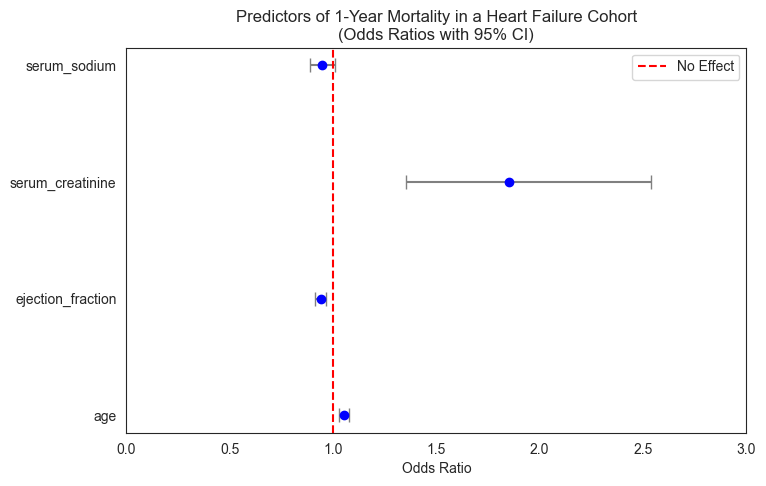

In [13]:
# Plotting
plt.figure(figsize=(8, 5))
sns.set_style("white")
plt.errorbar(forest_df['Odds Ratio'], forest_df.index, 
             xerr=[forest_df['Odds Ratio'] - forest_df['CI Lower'], 
                   forest_df['CI Upper'] - forest_df['Odds Ratio']],
             fmt='o', color='blue', ecolor='gray', capsize=5)

plt.axvline(x=1, linestyle='--', color='red', label='No Effect')
plt.xlabel('Odds Ratio')
plt.xlim(0, 3)

# Improved descriptive title
plt.title('Predictors of 1-Year Mortality in a Heart Failure Cohort\n(Odds Ratios with 95% CI)')

plt.legend()

# Save the figure as a PDF
plt.savefig('./results/forest_plot_odds_ratios.pdf', bbox_inches='tight')

plt.show()